In [523]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px
from IPython.display import Markdown as md
from IPython.display import display, Image, SVG, Math, YouTubeVideo
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

**Display Results Table**

In [524]:
import plotly.graph_objs as go 

results_df =  pd.read_csv("data/fifaworldcup/results.csv")
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


**Display Team Rankings Table**

In [525]:
rank_df = pd.read_csv('data/fifaworldranking/fifa_ranking-2022-10-06.csv')

rank_df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


**Clean Ranking Data**

In [526]:
rank_df["rank_date"] = pd.to_datetime(rank_df["rank_date"])
rank_df = rank_df[(rank_df["rank_date"] >= "2020-1-1")].reset_index(drop=True)

rank_df["country_full"] = rank_df["country_full"].str.replace("IR Iran", "Iran").str.replace("Korea Republic", "South Korea").str.replace("USA", "United States")

rank_df = rank_df.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()

rank_df.head()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
0,2020-02-20,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
1,2020-02-21,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
2,2020-02-22,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
3,2020-02-23,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC
4,2020-02-24,149.0,Afghanistan,AFG,1052.0,1052.0,0.0,AFC


**Clean Results Data**

In [527]:
results_df["date"] = pd.to_datetime(results_df["date"])

results_df = results_df[(results_df["date"] >= "2020-1-1")].reset_index(drop=True)
results_df.head()



,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,2020-01-07,Barbados,Canada,1,4,Friendly,Irvine,United States,True
1,2020-01-09,Moldova,Sweden,0,1,Friendly,Doha,Qatar,True
2,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
3,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
4,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True


In [528]:
ranking_df = pd.pivot_table(data = rank_df, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
ranking_df.head()

rank_date,2020-02-20,2020-02-21,2020-02-22,2020-02-23,2020-02-24,2020-02-25,2020-02-26,2020-02-27,2020-02-28,2020-02-29,...,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,...,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04,1023.04
Albania,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,1356.0,...,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1361.81,1354.11
Algeria,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,1482.0,...,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1480.59,1489.10
American Samoa,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,...,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27,900.27
Andorra,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,1082.0,...,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1028.70,1035.20


In [529]:
best_ranks = ranking_df.loc[ranking_df['2022-10-06'].sort_values(ascending = False)[:10].index]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns, 
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))
    
fig.update_layout(
    title="Evolution of the FIFA Ranking for today\'s 10 best teams",
    yaxis_title="Points"
)
fig.show()

Text(0.5, 1.0, 'TOP 10 TYPE OF MATCH TOURNAMENTS')

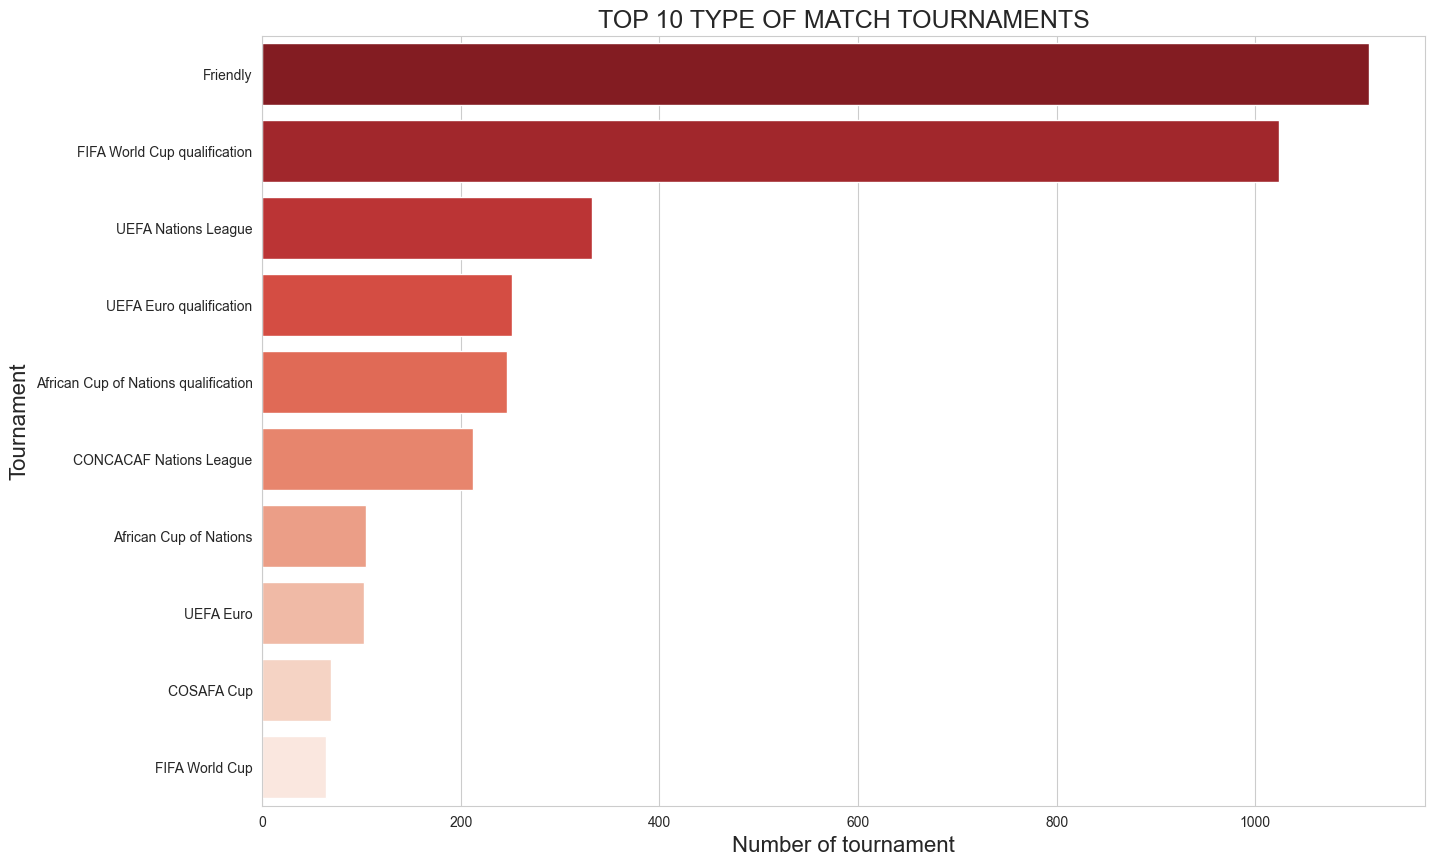

In [530]:
tournament = results_df['tournament'].value_counts()
tournament = tournament[:10]

plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
ax = sns.barplot(y=tournament.index, x=tournament.values, palette="Reds_r", orient='h')
ax.set_ylabel('Tournament', size=16)
ax.set_xlabel('Number of tournament', size=16)
ax.set_title("TOP 10 TYPE OF MATCH TOURNAMENTS", fontsize=18)

In [531]:
# create two dataframe for the home and away teams
home = results_df[['home_team', 'home_score']].rename(columns={'home_team':'team', 'home_score':'score'})
away = results_df[['away_team', 'away_score']].rename(columns={'away_team':'team', 'away_score':'score'})

# merge it into one
# team_score = pd.concat([home, away], ignore_index=True)

# for home in away:
#     home.append(df)

# final_df = pd.concat(df_list)
team_score = pd.concat([home, away])

# make an aggregation of the the score column group by the team
country_info = team_score.groupby('team')['score'].agg(['sum','count','mean']).reset_index()
country_info = country_info.rename(columns={'sum':'nb_goals', 'count':'nb_matches', 'mean':'goal_avg'})

Text(0.5, 1.0, 'TOP 10 OF GOAL AVERAGE PER MATCH')

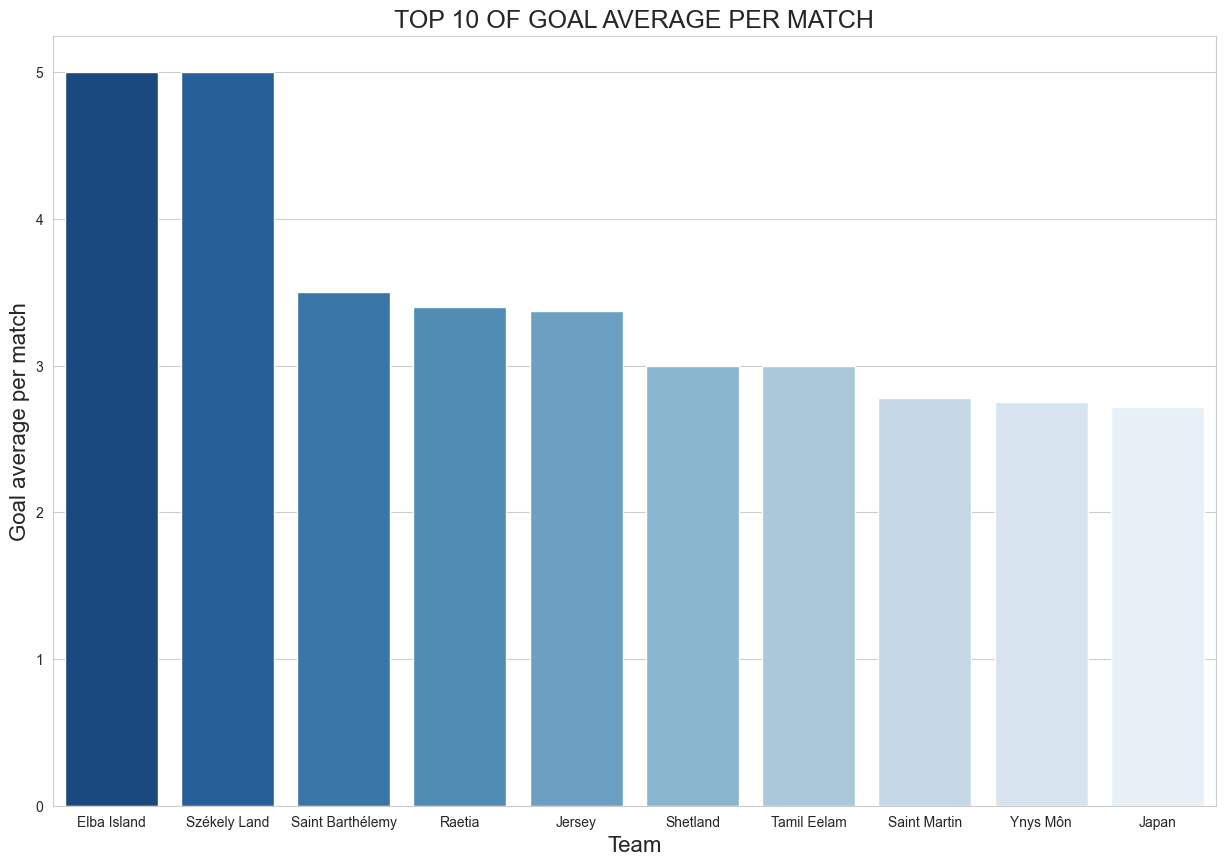

In [532]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='goal_avg', ascending=False)[:10]
ax = sns.barplot(x="team", y="goal_avg", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Goal average per match', size=16)
ax.set_title("TOP 10 OF GOAL AVERAGE PER MATCH", fontsize=18)

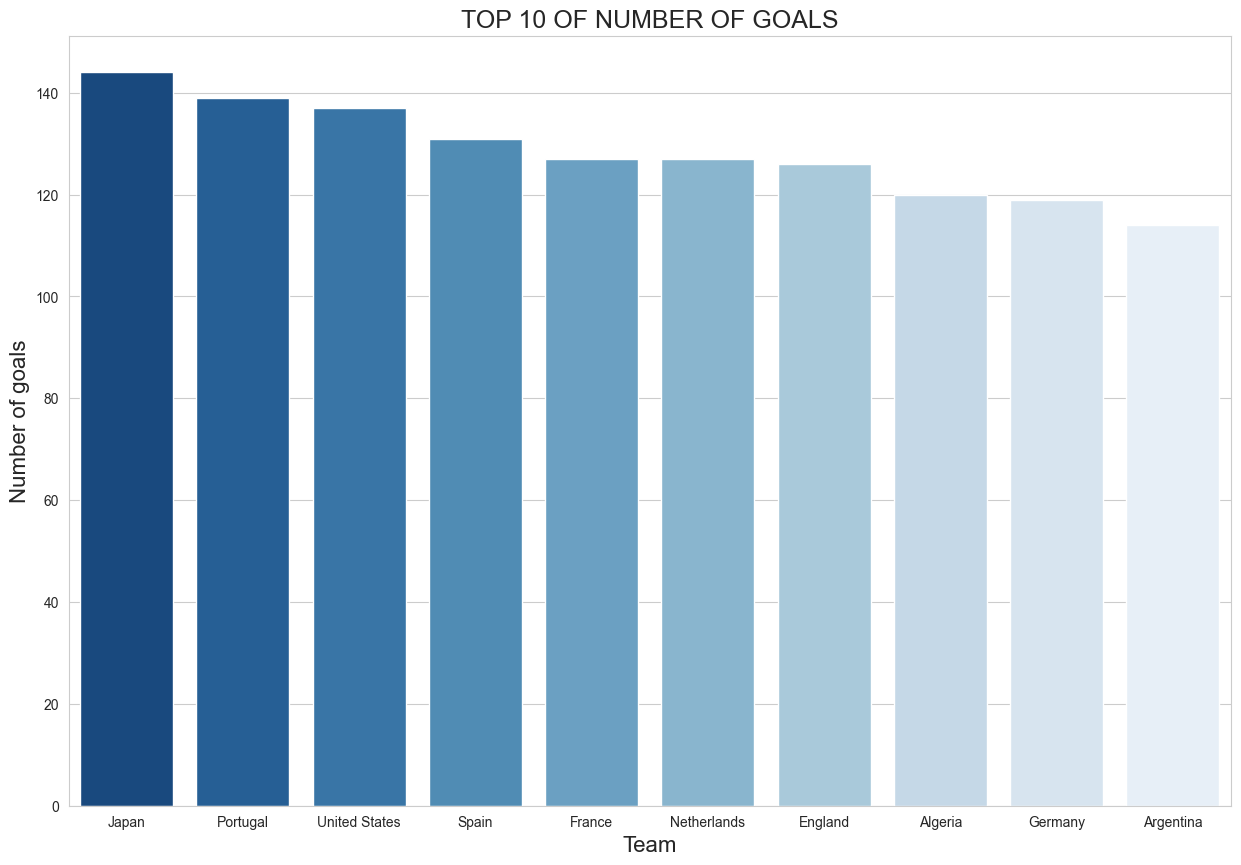

In [533]:
plt.figure(figsize = (15,10))
sns.set_style("whitegrid")
plt_data = country_info.sort_values(by='nb_goals', ascending=False)[:10]
ax = sns.barplot(x="team", y="nb_goals", data=plt_data, palette="Blues_r")
ax.set_xlabel('Team', size=16)
ax.set_ylabel('Number of goals', size=16)
ax.set_title("TOP 10 OF NUMBER OF GOALS", fontsize=18)

del plt_data, country_info

In [534]:
world_cup = pd.read_csv("data/international-football-results-from-1872-to-2017/Fifa_Worldcup_2022_Groups.csv")


world_cup.head()

,Group,Flag_Image,Team,Country_Name_Short,First match against,Second match against,Third match against
0,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Qatar,QAT,Ecuador,Senegal,Netherlands
1,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Ecuador,ECU,Qatar,Netherlands,Senegal
2,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Senegal,SEN,Netherlands,Qatar,Ecuador
3,A,https://cloudinary.fifa.com/api/v3/picture/fla...,Netherlands,NED,Senegal,Ecuador,Qatar
4,B,https://cloudinary.fifa.com/api/v3/picture/fla...,England,ENG,Iran,USA,Wales


In [535]:
world_cup.columns

Index(['Group', 'Flag_Image', 'Team', 'Country_Name_Short',
       'First match against', 'Second match against', 'Third match against'],
      dtype='object')

In [536]:
world_cup = world_cup.replace({
                               "Korea Republic" : "South Korea","USA": "United States"})
world_cup = world_cup.set_index('Team')
world_cup.head()

,Group,Flag_Image,Country_Name_Short,First match against,Second match against,Third match against
Team,,,,,,
Qatar,A,https://cloudinary.fifa.com/api/v3/picture/fla...,QAT,Ecuador,Senegal,Netherlands
Ecuador,A,https://cloudinary.fifa.com/api/v3/picture/fla...,ECU,Qatar,Netherlands,Senegal
Senegal,A,https://cloudinary.fifa.com/api/v3/picture/fla...,SEN,Netherlands,Qatar,Ecuador
Netherlands,A,https://cloudinary.fifa.com/api/v3/picture/fla...,NED,Senegal,Ecuador,Qatar
England,B,https://cloudinary.fifa.com/api/v3/picture/fla...,ENG,Iran,United States,Wales


In [537]:
#Join Ranking with match 
results_df = results_df.merge(rank_df,
                         left_on=['date', 'home_team'],
                         right_on=['rank_date', 'country_full'])
# matches.head()

results_df = results_df.merge(rank_df, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], suffixes=('_home', '_away')) 
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,rank_change_home,confederation_home,rank_date_away,rank_away,country_full_away,country_abrv_away,total_points_away,previous_points_away,rank_change_away,confederation_away
0,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,0.0,UEFA,2020-09-03,8.0,Spain,ESP,1636.0,1636.0,0.0,UEFA
1,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,0.0,UEFA,2020-09-03,12.0,Switzerland,SUI,1608.0,1608.0,0.0,UEFA
2,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,0.0,UEFA,2020-09-03,29.0,Serbia,SRB,1494.0,1494.0,0.0,UEFA
3,2020-09-03,Turkey,Hungary,0,1,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,0.0,UEFA,2020-09-03,52.0,Hungary,HUN,1416.0,1416.0,0.0,UEFA
4,2020-09-03,Bulgaria,Republic of Ireland,1,1,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,0.0,UEFA,2020-09-03,34.0,Republic of Ireland,IRL,1486.0,1486.0,0.0,UEFA


<Axes: >

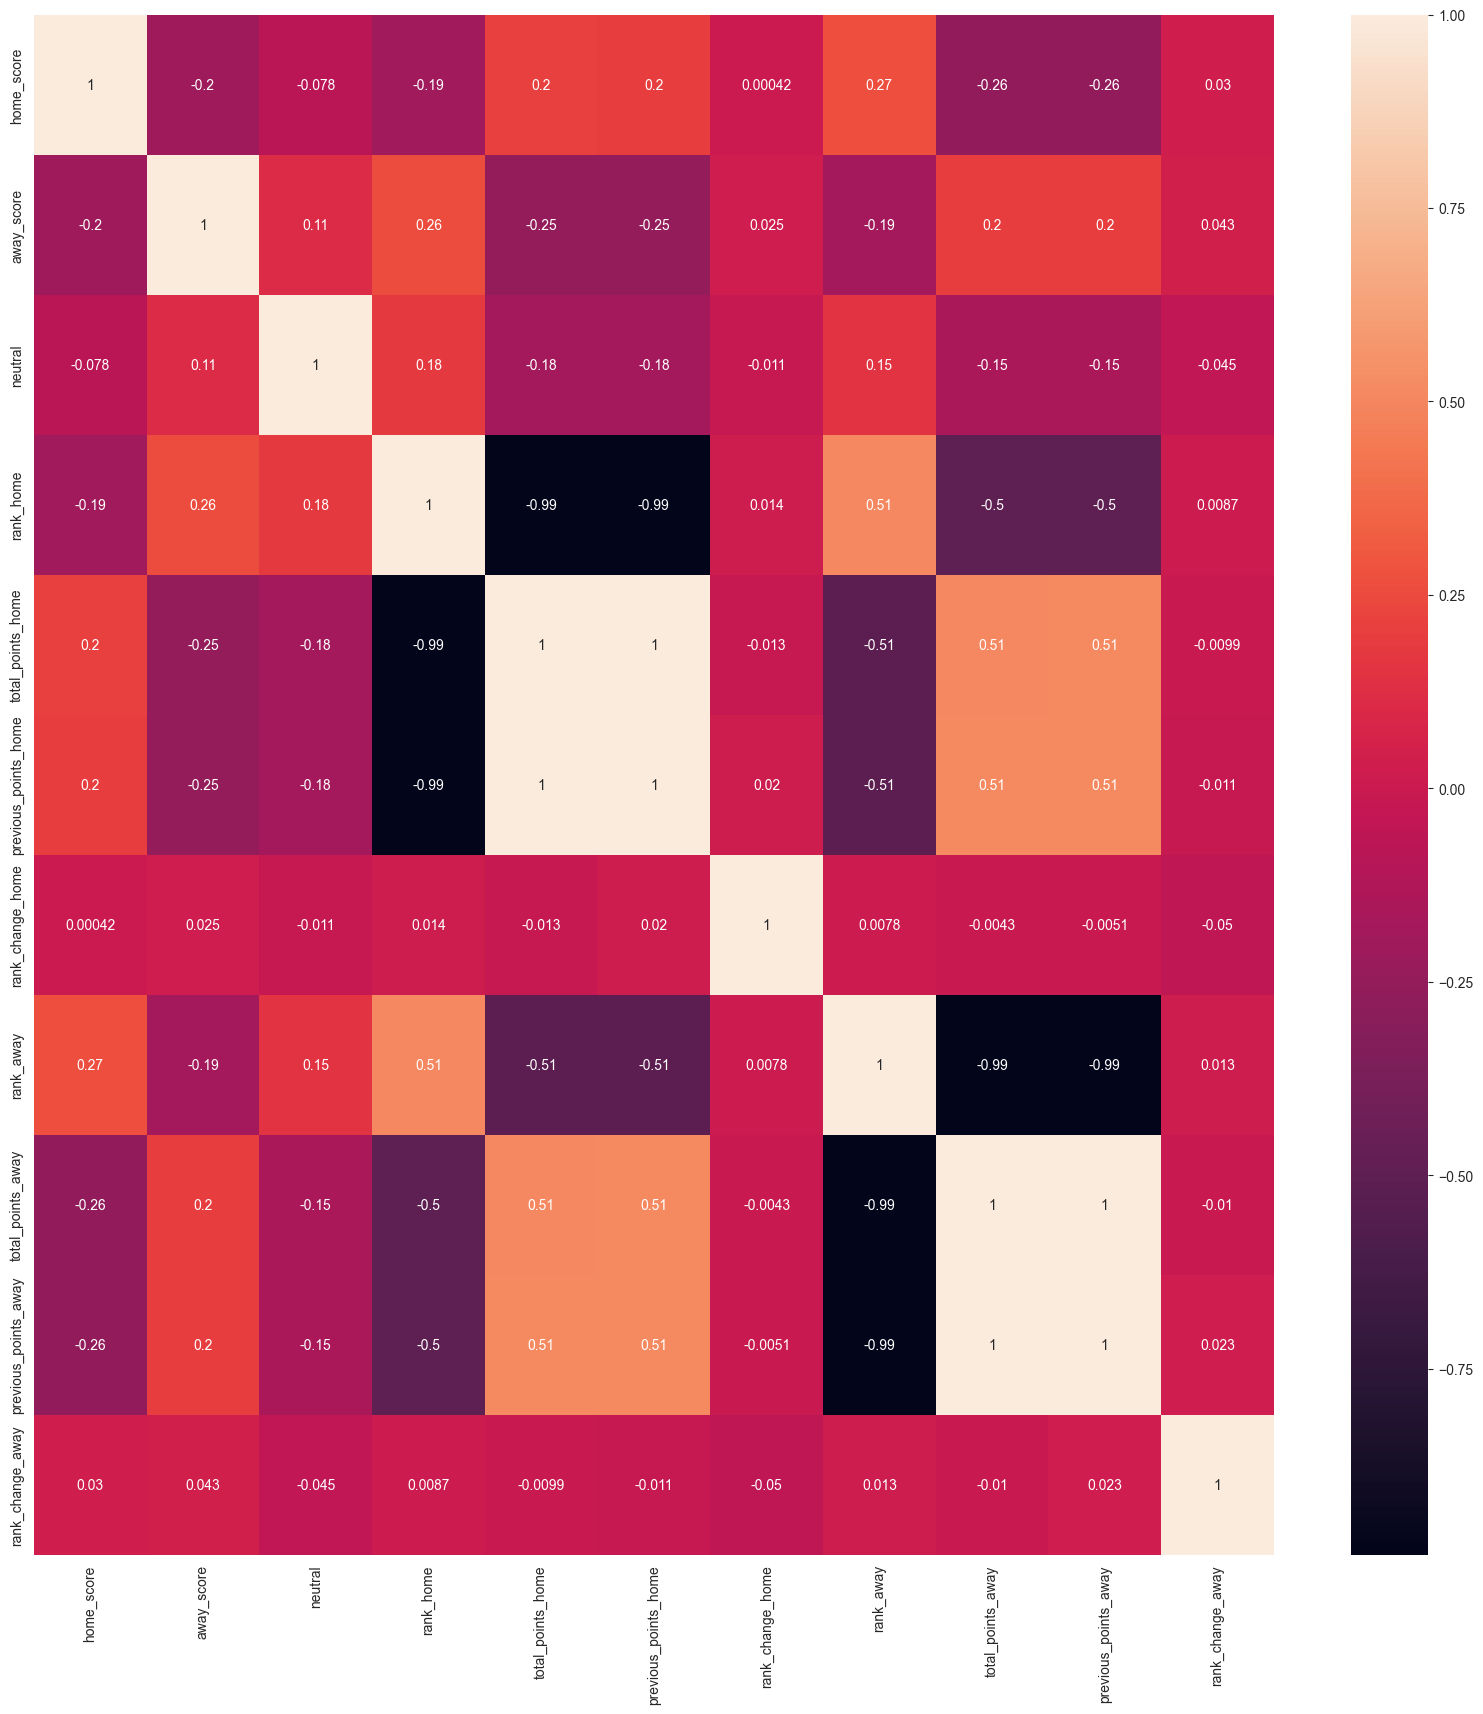

In [538]:
results_df.head()
fig, ax = plt.subplots()
fig.set_size_inches(20, 20)
corr1 = results_df.corr(numeric_only=True)
corr1
sns.heatmap(corr1,annot=True)

In [539]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away'],
      dtype='object')

In [540]:
results_df['rank_difference'] = results_df['rank_home'] - results_df['rank_away']
results_df['average_rank'] = (results_df['rank_home'] + results_df['rank_away'])/2
results_df['point_difference'] = results_df['total_points_home'] - results_df['total_points_away']
results_df['score_difference'] = results_df['home_score'] - results_df['away_score']
results_df['is_won'] = results_df['score_difference'] > 0 
results_df['is_stake'] = results_df['tournament'] != 'Friendly'



In [541]:
results_df['wc_participant'] = results_df['home_team'] * results_df['home_team'].isin(world_cup.index.tolist())
results_df['wc_participant'] = results_df['wc_participant'].replace({'':'Other'})
results_df = results_df.join(pd.get_dummies(results_df['wc_participant']))

In [542]:
results_df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,rank_date_home,...,Saudi Arabia,Senegal,Serbia,South Korea,Spain,Switzerland,Tunisia,United States,Uruguay,Wales
0,2020-09-03,Germany,Spain,1,1,UEFA Nations League,Stuttgart,Germany,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
1,2020-09-03,Ukraine,Switzerland,2,1,UEFA Nations League,Lviv,Ukraine,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
2,2020-09-03,Russia,Serbia,3,1,UEFA Nations League,Moscow,Russia,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
3,2020-09-03,Turkey,Hungary,0,1,UEFA Nations League,Sivas,Turkey,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False
4,2020-09-03,Bulgaria,Republic of Ireland,1,1,UEFA Nations League,Sofia,Bulgaria,False,2020-09-03,...,False,False,False,False,False,False,False,False,False,False


In [543]:
results_df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral', 'rank_date_home',
       'rank_home', 'country_full_home', 'country_abrv_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'confederation_home', 'rank_date_away', 'rank_away',
       'country_full_away', 'country_abrv_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'confederation_away',
       'rank_difference', 'average_rank', 'point_difference',
       'score_difference', 'is_won', 'is_stake', 'wc_participant', 'Argentina',
       'Australia', 'Belgium', 'Brazil', 'Cameroon', 'Canada', 'Costa Rica',
       'Croatia', 'Denmark', 'Ecuador', 'England', 'France', 'Germany',
       'Ghana', 'Iran', 'Japan', 'Mexico', 'Morocco', 'Netherlands', 'Other',
       'Poland', 'Portugal', 'Qatar', 'Saudi Arabia', 'Senegal', 'Serbia',
       'South Korea', 'Spain', 'Switzerland', 'Tunisia', 'United States',
       

In [544]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

In [545]:
X, y = results_df.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], results_df['is_won']
print(X)
print(y)

      average_rank  rank_difference  point_difference  is_stake
0             11.5              7.0            -34.00      True
1             18.0             12.0            -71.00      True
2             33.5              9.0            -24.00      True
3             40.5            -23.0             78.00      True
4             46.5             25.0           -105.00      True
...            ...              ...               ...       ...
2058          30.5             11.0            -60.96      True
2059          42.5            -45.0            190.96      True
2060         107.0             -2.0              3.38      True
2061          53.5             -9.0             42.35      True
2062         150.0             26.0            -99.19      True

[2063 rows x 4 columns]
0       False
1        True
2        True
3       False
4       False
        ...  
2058    False
2059    False
2060     True
2061     True
2062     True
Name: is_won, Length: 2063, dtype: bool


In [546]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [547]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [548]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test) 
    prob_test = model.predict(X_test) 
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)\
        
    cm = confusion_matrix(y_test, prob_test, labels=model.classes_)
    # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='all')
    # disp.plot()
    plt.show()
    return model, accuracy, roc_auc, coh_kap, time_taken



Accuracy = 0.7046004842615012
ROC Area under Curve = 0.7039739612709155
Cohen's Kappa = 0.4079479225418312
Time taken = 0.00651240348815918
              precision    recall  f1-score   support

       False    0.71759   0.71759   0.71759       216
        True    0.69036   0.69036   0.69036       197

    accuracy                        0.70460       413
   macro avg    0.70397   0.70397   0.70397       413
weighted avg    0.70460   0.70460   0.70460       413



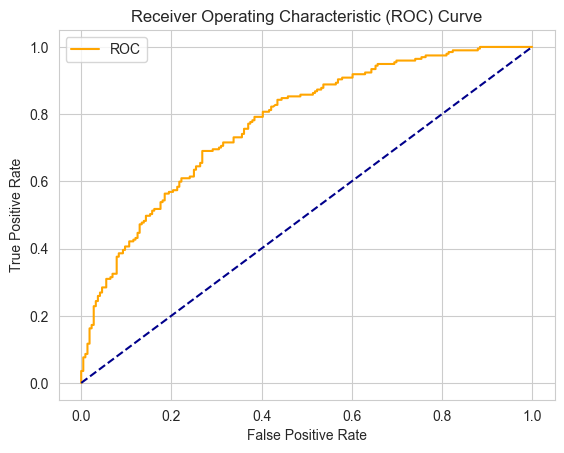

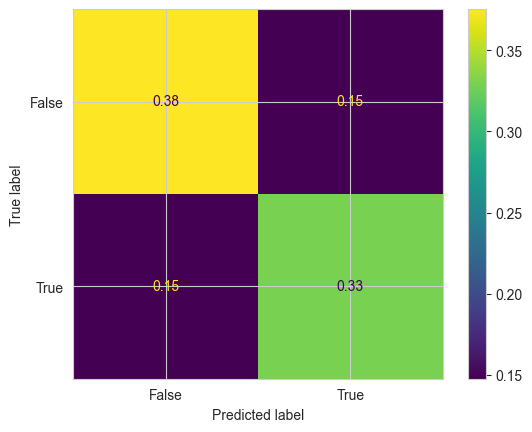

In [549]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)